# <center>${\textbf{Artificial Intelligence Decision Support System}}$<br>${\textbf{ for Groundwater Management under Climate Change:}}$</center><br><center>${\textbf{ Application to Mornag Region in Tunisia}}$</center><br><center>${\textbf{Part 4 : Deployment Using LSTM}}$</center>


**Table of Contents**
* [Importing Libraries](#libraris)
* [Forecasting under Climate Change scenarios](#cc)
    * [Representative Concentration Pathway :RCP 4.5](#rcp4.5_1)
    * [Representative Concentration Pathway :RCP 8.5](#rcp8.5_1)
* [Analysis](#Analysis)


    

<a id="libraries"></a>

${\textbf{Importing Libraries}}$

In [1]:
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

import pickle

import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
Historical_Data = pd.read_pickle('./Pickles/Data/Historical_Data.pkl')
LSTM = tf.keras.models.load_model('./Pickles/Models/LSTMPerfect.h5', compile=False)

In [5]:
from tensorflow.keras.utils import plot_model

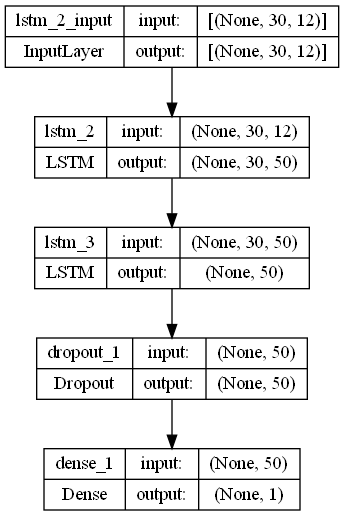

In [6]:
dot_img_file = '/tmp/model_1.png'
plot_model(LSTM, to_file=dot_img_file, show_shapes=True)

<a id="cc"></a>

## ${\textbf{LSTM Forecasting under Climate Change scenarios}}$

In [7]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)

<a id="rcp4.5_1"></a>

>${\textbf{Representative Concentration Pathway :RCP 4.5 }}$

In [8]:
RCP45 = pd.read_pickle('./Pickles/Data/RCP45BNU.pkl')
del RCP45['MonthlyRF']
RCP45.rename(columns = {'Mean':'MonthlyRF'}, inplace = True)#Renaming Zone_num to zone for more clarity

In [9]:
del RCP45['Lat']
del RCP45['Lon']
del RCP45['Lat_Pluviometer']
del RCP45['Lon_Pluviometer']

In [10]:
lb_make = LabelEncoder()
RCP45["Piezometer"] = lb_make.fit_transform(RCP45["Piezometer"])
lb_make1 = LabelEncoder()
RCP45["Pluviometer"] = lb_make1.fit_transform(RCP45["Pluviometer"])
lb_make2 = LabelEncoder()
RCP45["SPI_classes"] = lb_make2.fit_transform(RCP45["SPI_classes"])
RCP45['Pz']=0

In [11]:
scaler = MinMaxScaler(feature_range=(0,1))
RCP45_scaled = scaler.fit_transform(RCP45)

In [12]:
X,Y=createXY(RCP45_scaled,30)

In [13]:
prediction=LSTM.predict(X)
prediction_copies_array = np.repeat(prediction,12, axis=-1)
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),12)))[:,0]

RCP45["Piezometer"] = lb_make.inverse_transform(RCP45["Piezometer"])
RCP45["Pluviometer"] = lb_make1.inverse_transform(RCP45["Pluviometer"])
RCP45["SPI_classes"] = lb_make2.inverse_transform(RCP45["SPI_classes"])
RCP45=RCP45[30:]
RCP45["Pz"]=pred

5382/5382 [==============================] - 24s 4ms/step


In [14]:
RCP45

,Piezometer,Pluviometer,YearlyRF,SemestrialRF,TrimestrialRF,MonthlyRF,Zone,SPI,SPI_classes,Month,Year,Pz
date,,,,,,,,,,,,
2009-06-01,Ben Zazia,BEN AROUS I MUNICIPA,343.83,245.66,86.28,71.55,4,1.692817,Very wet,6,2009,27.627991
2009-06-01,Fraj,BEN AROUS I MUNICIPA,343.83,245.66,86.28,71.55,4,1.692817,Very wet,6,2009,20.128296
2009-06-01,Bir El Kif,BEN AROUS I MUNICIPA,343.83,245.66,86.28,71.55,4,1.692817,Very wet,6,2009,15.326772
2009-06-01,El Attar,BEN AROUS I MUNICIPA,343.83,245.66,86.28,71.55,4,1.692817,Very wet,6,2009,12.072485
2009-06-01,Majoul,BEN AROUS I MUNICIPA,343.83,245.66,86.28,71.55,4,1.692817,Very wet,6,2009,12.899660
...,...,...,...,...,...,...,...,...,...,...,...,...
2100-12-01,UCP Ouzra,OUZRA AGRI FLORA,256.99,153.64,111.50,25.56,1,-0.138415,Moderately dry,12,2100,12.615036
2100-12-01,Salah Khamar,OUZRA AGRI FLORA,256.99,153.64,111.50,25.56,1,-0.138415,Moderately dry,12,2100,27.257507
2100-12-01,Haj Hadi Jani,OUZRA AGRI FLORA,256.99,153.64,111.50,25.56,1,-0.138415,Moderately dry,12,2100,34.782032


<a id="rcp8.5_1"></a>

>${\textbf{Representative Concentration Pathway :RCP 8.5 }}$

In [15]:
RCP85 = pd.read_pickle('./Pickles/Data/RCP85BNU.pkl')
del RCP85['MonthlyRF']
RCP85.rename(columns = {'Mean':'MonthlyRF'}, inplace = True)#Renaming Zone_num to zone for more clarity

In [16]:
del RCP85['Lat']
del RCP85['Lon']
del RCP85['Lat_Pluviometer']
del RCP85['Lon_Pluviometer']

In [17]:
lb_make = LabelEncoder()
RCP85["Piezometer"] = lb_make.fit_transform(RCP85["Piezometer"])
lb_make1 = LabelEncoder()
RCP85["Pluviometer"] = lb_make1.fit_transform(RCP85["Pluviometer"])
lb_make2 = LabelEncoder()
RCP85["SPI_classes"] = lb_make2.fit_transform(RCP85["SPI_classes"])
RCP85['Pz']=0

In [18]:
scaler = MinMaxScaler(feature_range=(0,1))
RCP85_scaled = scaler.fit_transform(RCP85)

In [19]:
X,Y=createXY(RCP85_scaled,30)

In [20]:
prediction=LSTM.predict(X)
prediction_copies_array = np.repeat(prediction,12, axis=-1)
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),12)))[:,0]

RCP85["Piezometer"] = lb_make.inverse_transform(RCP85["Piezometer"])
RCP85["Pluviometer"] = lb_make1.inverse_transform(RCP85["Pluviometer"])
RCP85["SPI_classes"] = lb_make2.inverse_transform(RCP85["SPI_classes"])
RCP85=RCP85[30:]
RCP85["Pz"]=pred

5382/5382 [==============================] - 22s 4ms/step


In [21]:
RCP85

,Piezometer,Pluviometer,YearlyRF,SemestrialRF,TrimestrialRF,MonthlyRF,Zone,SPI,SPI_classes,Month,Year,Pz
date,,,,,,,,,,,,
2009-06-01,Ben Zazia,BEN AROUS I MUNICIPA,383.17,245.36,46.24,26.63,4,-0.080428,Moderately dry,6,2009,27.771830
2009-06-01,Fraj,BEN AROUS I MUNICIPA,383.17,245.36,46.24,26.63,4,-0.080428,Moderately dry,6,2009,20.030735
2009-06-01,Bir El Kif,BEN AROUS I MUNICIPA,383.17,245.36,46.24,26.63,4,-0.080428,Moderately dry,6,2009,15.067624
2009-06-01,El Attar,BEN AROUS I MUNICIPA,383.17,245.36,46.24,26.63,4,-0.080428,Moderately dry,6,2009,11.701049
2009-06-01,Majoul,BEN AROUS I MUNICIPA,383.17,245.36,46.24,26.63,4,-0.080428,Moderately dry,6,2009,12.264249
...,...,...,...,...,...,...,...,...,...,...,...,...
2100-12-01,UCP Ouzra,OUZRA AGRI FLORA,337.77,157.14,138.04,25.31,1,-0.133451,Moderately dry,12,2100,12.742497
2100-12-01,Salah Khamar,OUZRA AGRI FLORA,337.77,157.14,138.04,25.31,1,-0.133451,Moderately dry,12,2100,28.121664
2100-12-01,Haj Hadi Jani,OUZRA AGRI FLORA,337.77,157.14,138.04,25.31,1,-0.133451,Moderately dry,12,2100,35.338493


<a id="Analysis"></a>

${\textbf{Analysis }}$

Ben Zazia


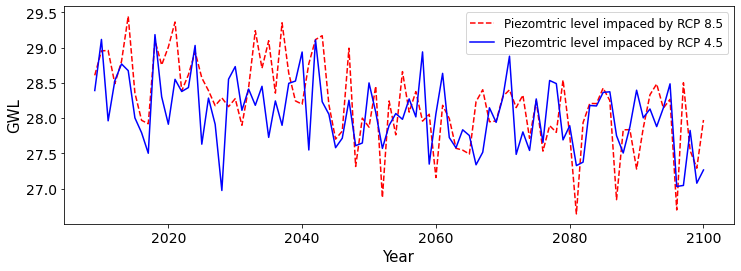

Fraj


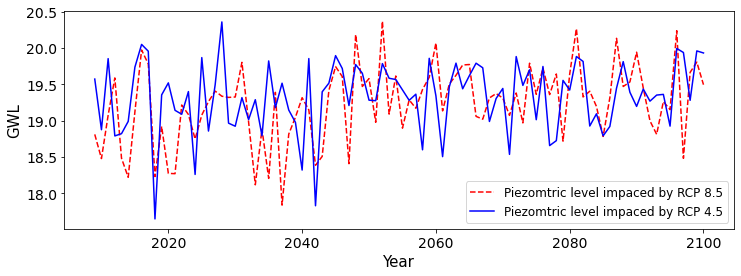

Bir El Kif


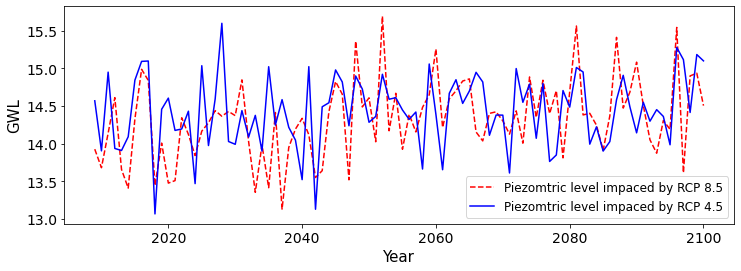

El Attar


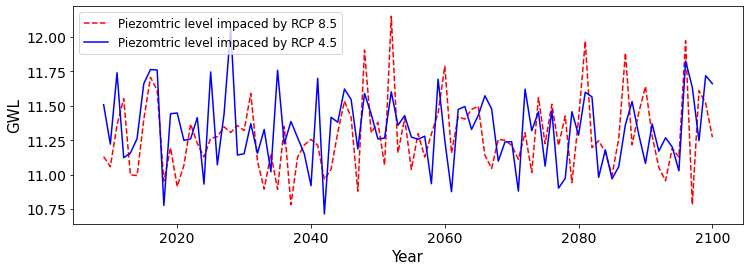

Majoul


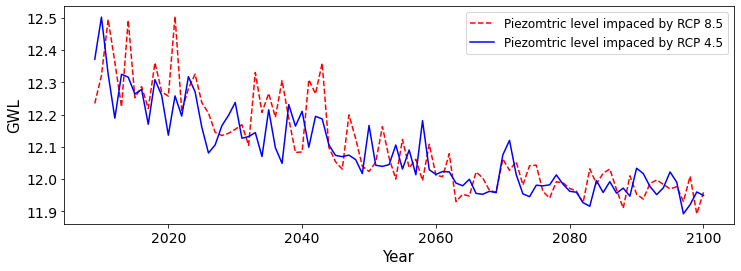

Puits Public_5779


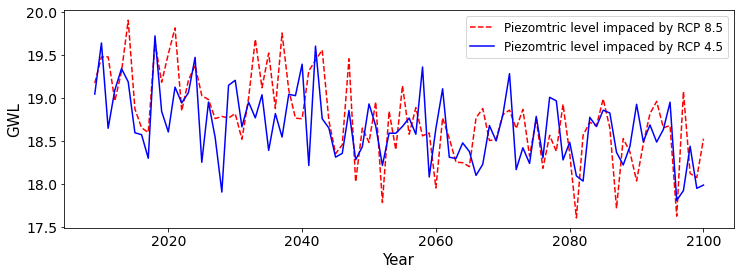

Hachmi Allagui


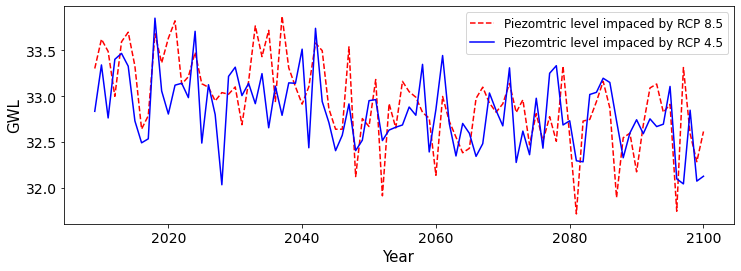

G.O.V.P.F


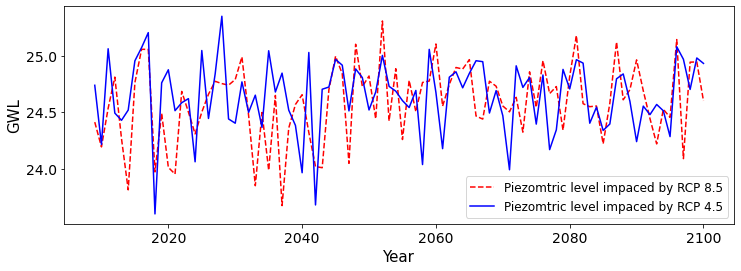

Mzabi


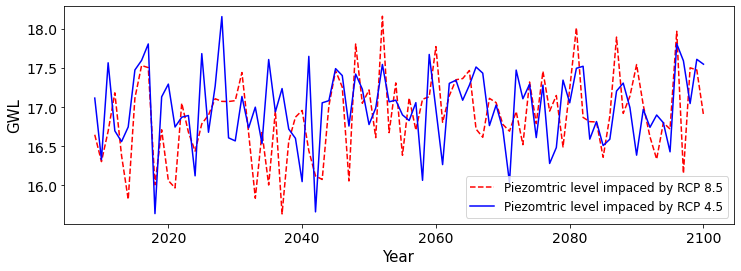

Naceur Dababi


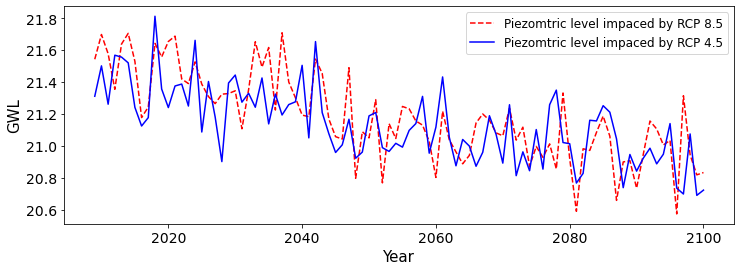

INRAT


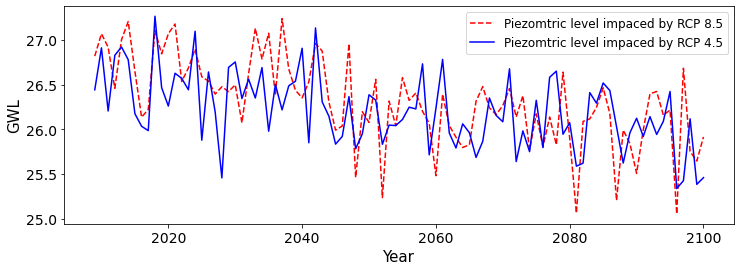

Mohamed Ben Nouiji


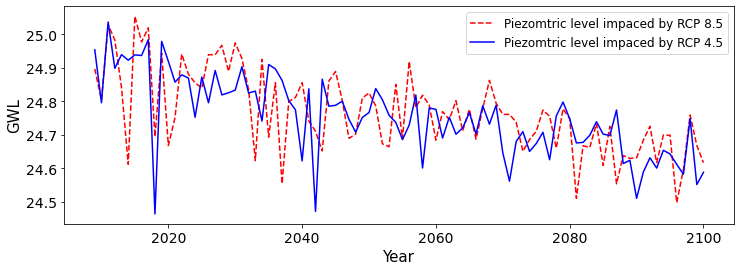

UCP Errissala_B


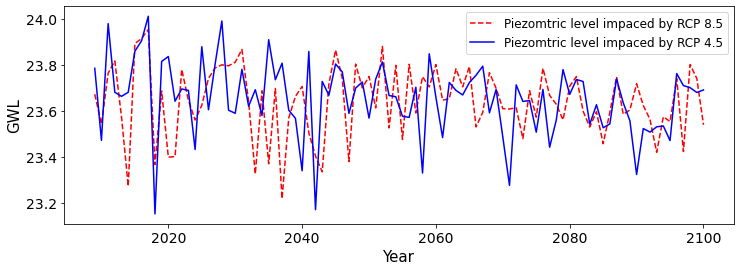

Ben Khalifa


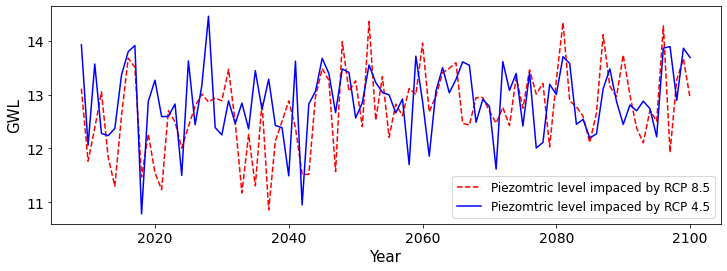

Usine Curamique


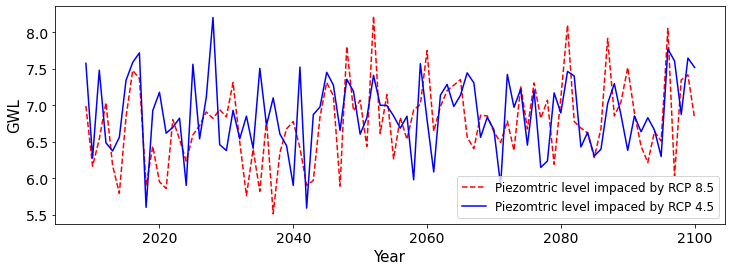

Mohamed Boutnini


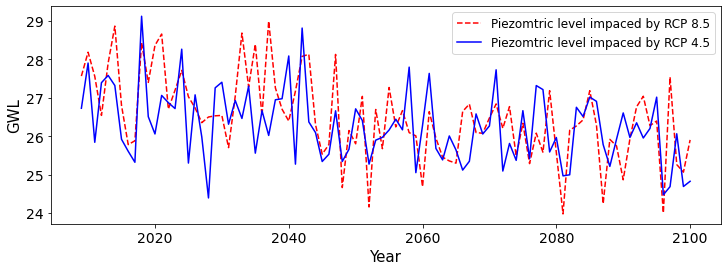

INAT Zaouia


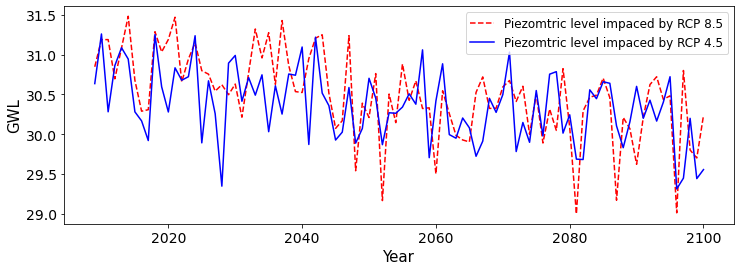

Ali El Almi


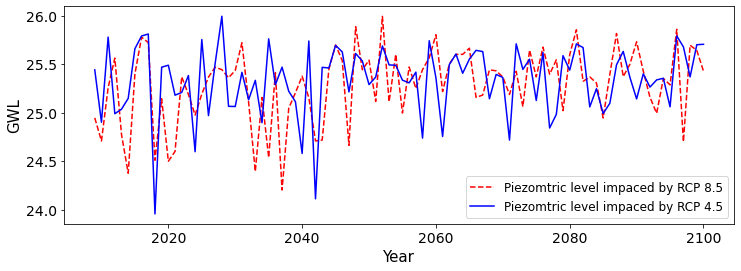

Bel Hassen Sahli


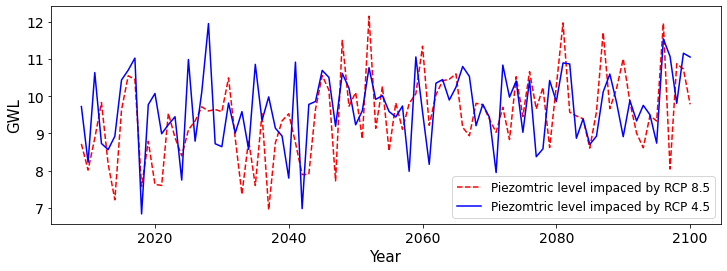

Azzouz El Bahri 1


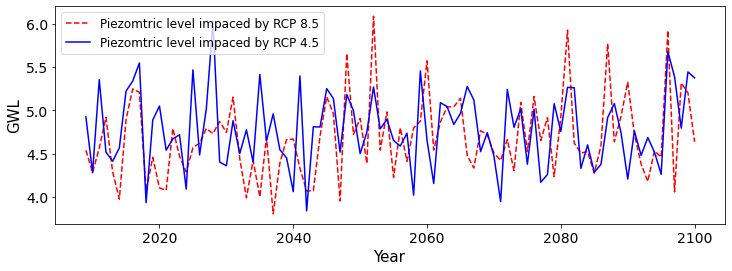

Haj Meftah Allagui


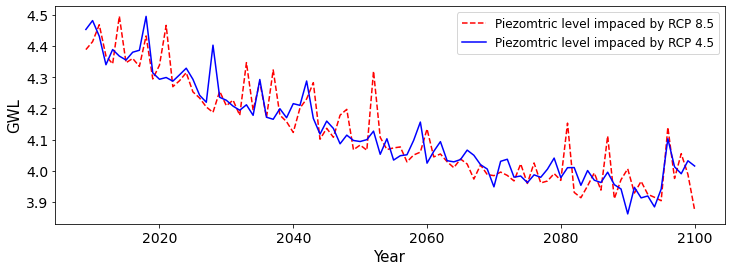

Salah Meziene


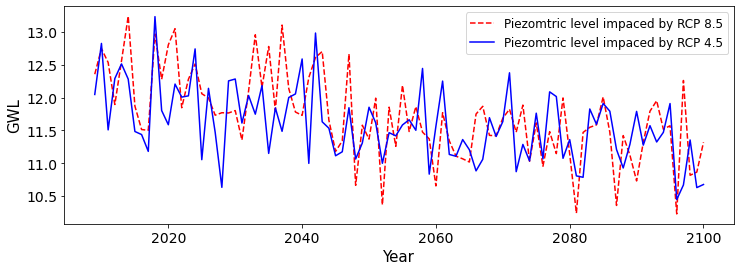

UCP Sidi Daoud


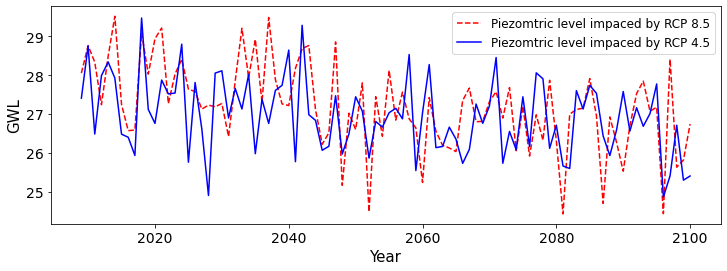

Hamadi Belarbi


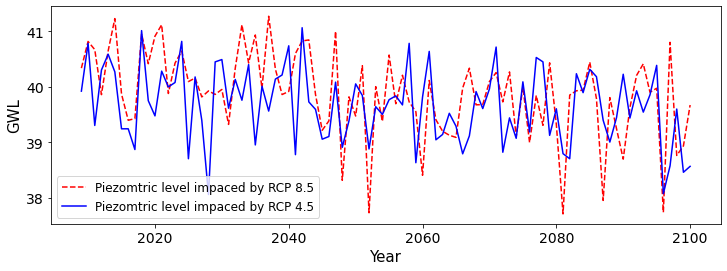

UCP Ennajah_484


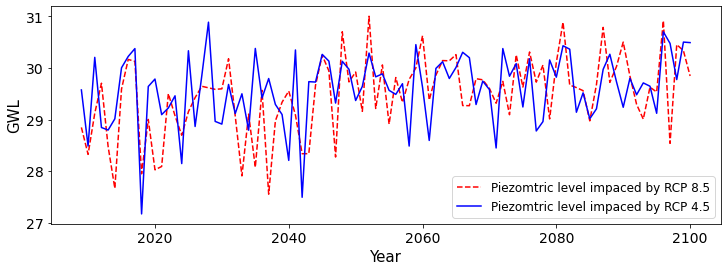

UCP Ennajah_494


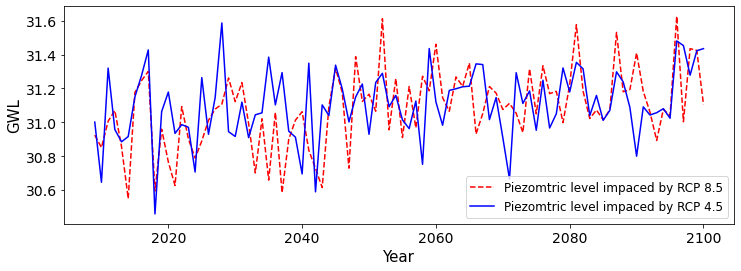

Ali et Med Bel Arbi


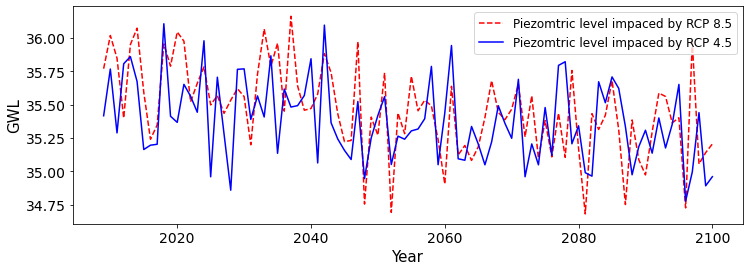

UCP Errissala_620


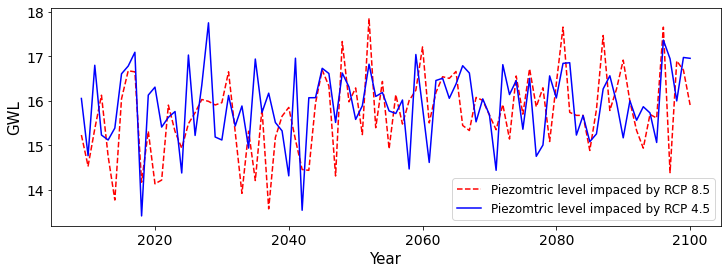

Puit OTD


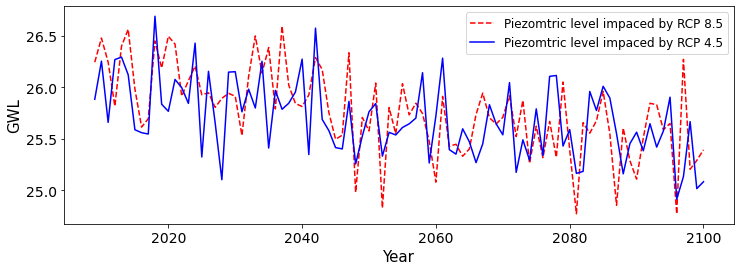

Sadok Belaid


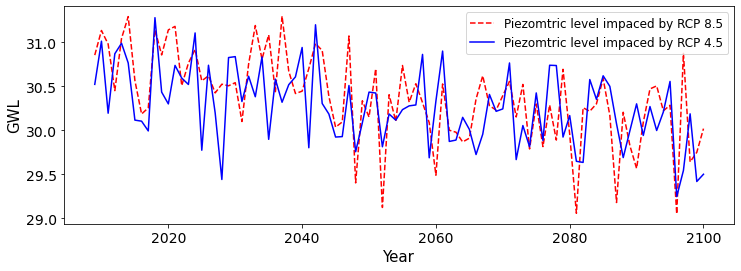

Huritier Sgaier


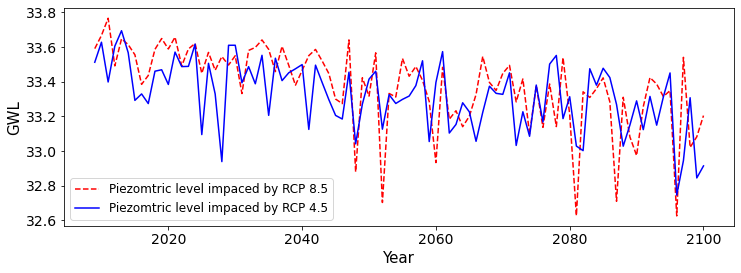

Puits Public_3292


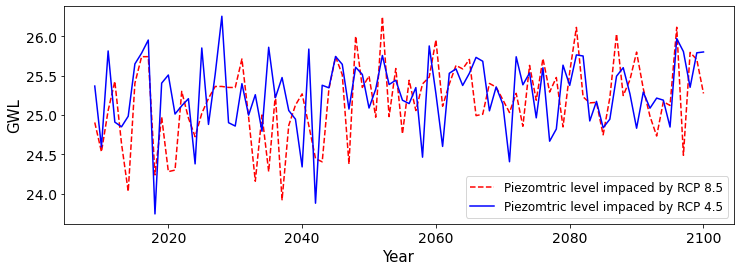

B. Abdallah


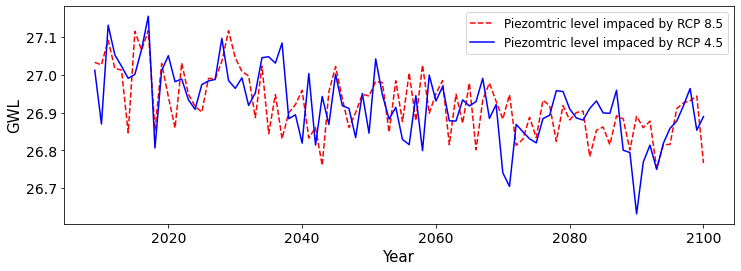

Puits public_6582


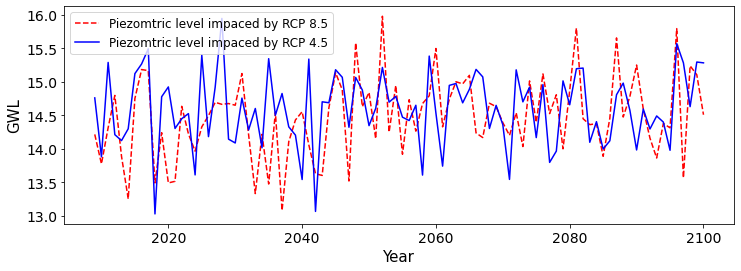

Mohamed ben Rouis


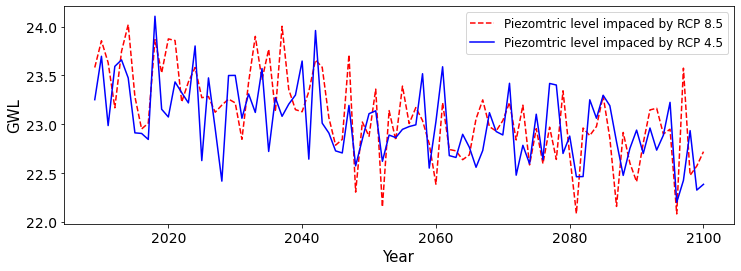

Ali Hanzouti


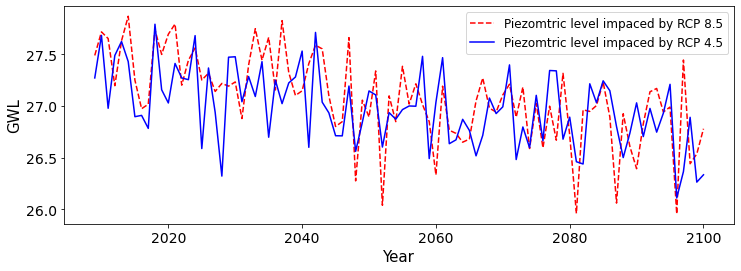

Puits Barrouta


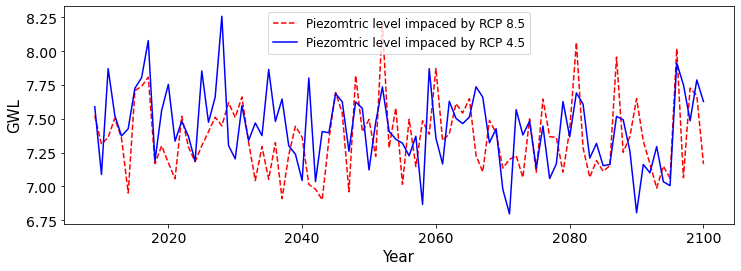

Ben Saad


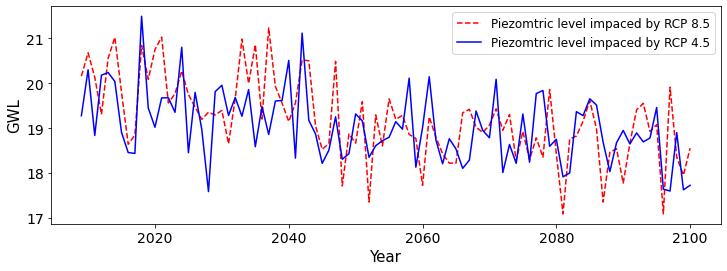

Ecole de Police


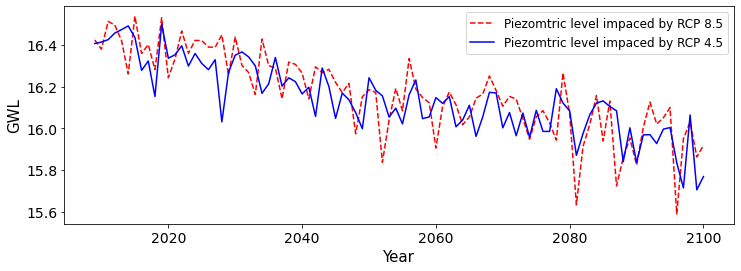

UCP Ouzra


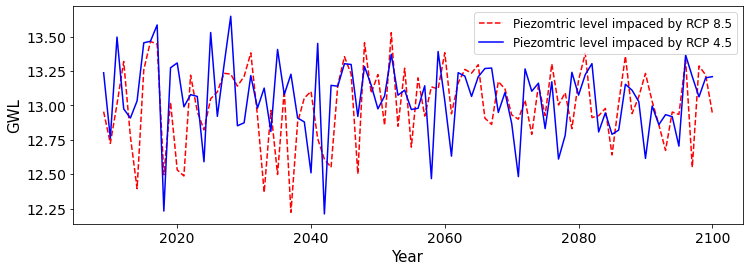

Salah Khamar


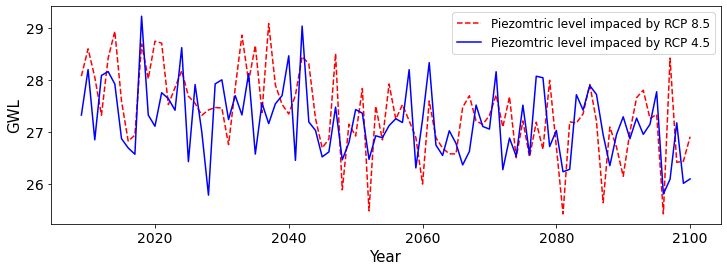

Haj Hadi Jani


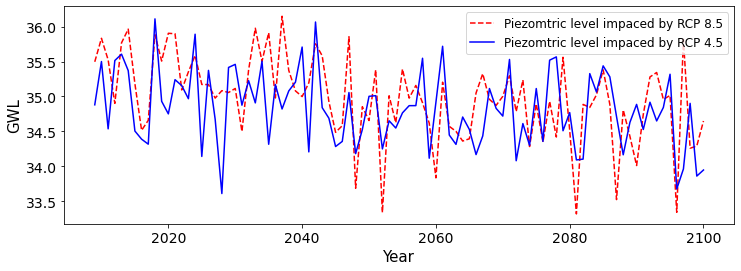

Azaiz ben Attia


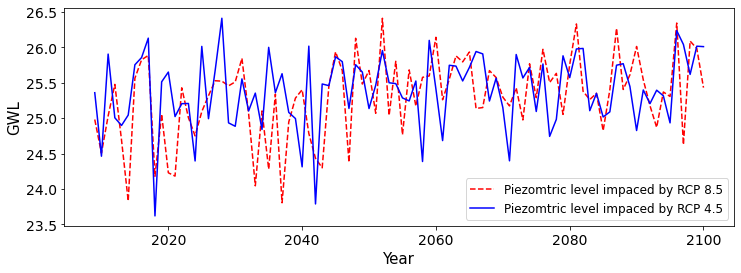

Delagi


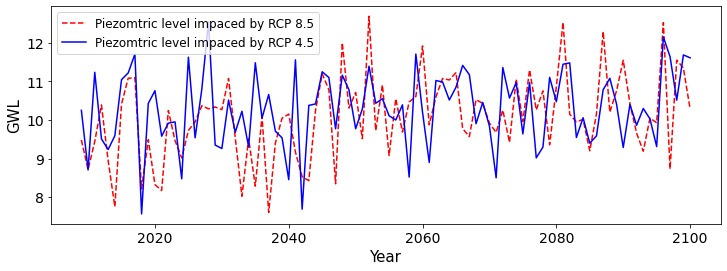

In [23]:
list_nom = RCP85.Piezometer.unique()
# list_nom=['Fraj']
# plt.rcParams['font.size'] = '16'
for d in list_nom:
    print(d)
    df=RCP85[(RCP85.Piezometer==d)]
    df1=RCP45[(RCP45.Piezometer==d)]
    plt.rcParams['figure.figsize'] = (12, 4)
    plt.rcParams['axes.grid'] = False
    plt.rcParams['font.size'] = '14'
    plt.plot(df.groupby(['Year'])['Pz'].mean(),'r--')
    plt.plot(df1.groupby(['Year'])['Pz'].mean(),'b')
    plt.legend(('Piezomtric level impaced by RCP 8.5','Piezomtric level impaced by RCP 4.5'),fontsize=12, loc = 0)
    plt.xlabel('Year',fontsize=15)
    plt.ylabel('GWL',fontsize=15)
    plt.grid
    plt.show()